In [ ]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
from ipywidgets import interact



In [ ]:
data=pd.read_csv("drug.csv")

**SHAPE OF THE DATASET**

In [ ]:
data.shape

(161297, 7)

In [ ]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
print("Number of Unique Drugs present in the Datset:",data['drugName'].nunique())

Number of Unique Drugs present in the Datset: 3436


In [ ]:
print("Number of Unique Medical Conditions present in the Dataset: ",data['condition'].nunique())

Number of Unique Medical Conditions present in the Dataset:  884


In [ ]:
print("Starting Date: ",data['date'].min())

Starting Date:  1-Apr-08


In [ ]:
print("Ending Date: ",data['date'].max())

Ending Date:  9-Sep-17


**SUMMARIZING THE DATASET**

In [ ]:
data[['rating','usefulCount']].describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


**CHECKING FOR ANY NULL VALUES**

In [ ]:
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

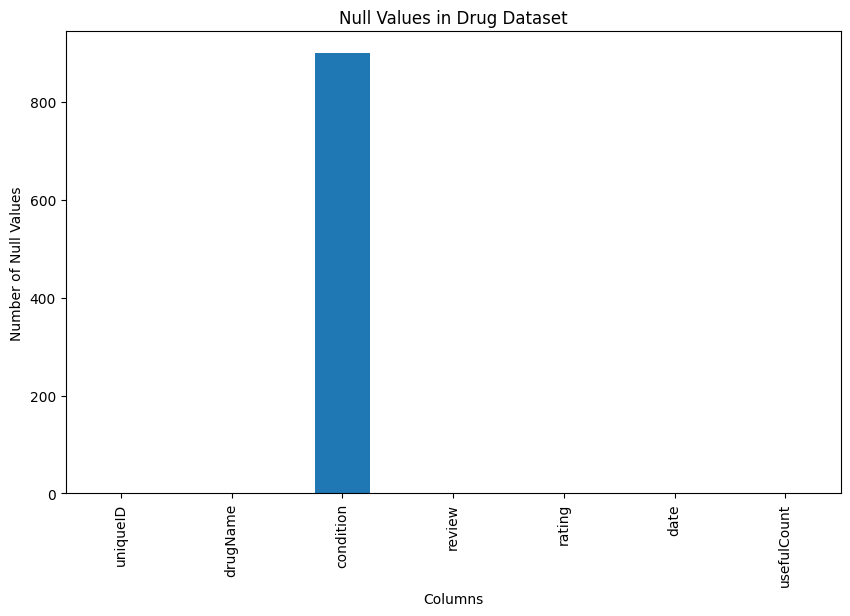

In [ ]:
null_counts = data.isnull().sum()

# Step 3: Plot a graph to visualize the null values
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Null Values in Drug Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

we know that condition is a very important information for recommending good drugs to the patients, so we will delete all the records where condition is null

In [ ]:
data=data.dropna()

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.isnull().sum().sum()

0

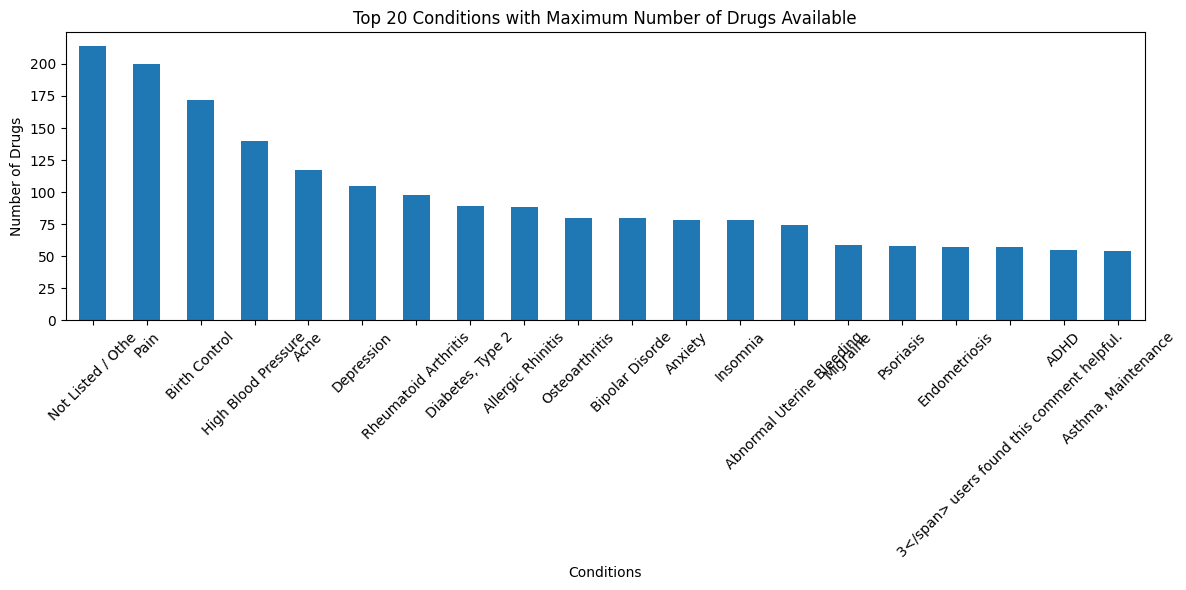

In [ ]:
condition_counts = data.groupby('condition')['drugName'].nunique()

# Step 3: Sort the conditions based on drug counts in descending order
sorted_conditions = condition_counts.sort_values(ascending=False)

# Step 4: Select the top 20 conditions with the highest drug counts
top_20_conditions = sorted_conditions.head(20)

# Step 5: Create a bar plot to visualize the top 20 conditions and drug counts
plt.figure(figsize=(12, 6))
top_20_conditions.plot(kind='bar')
plt.title('Top 20 Conditions with Maximum Number of Drugs Available')
plt.xlabel('Conditions')
plt.ylabel('Number of Drugs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()








import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download the WordNet resource
nltk.download('wordnet')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def preprocess_review(text, method='stemming'):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    
    # Apply stemming or lemmatization to each word
    if method == 'stemming':
        stemmed_words = [stemmer.stem(word) for word in words]
        processed_text = ' '.join(stemmed_words)
    elif method == 'lemmatization':
        lem_words = [lemmatizer.lemmatize(word) for word in words]
        processed_text = ' '.join(lem_words)
    else:
        raise ValueError("Invalid method. Choose 'stemming' or 'lemmatization'.")
    
    return processed_text
df['processed_review'] = df['review'].apply(preprocess_review, method='stemming')
# or
df['processed_review'] = df['review'].apply(preprocess_review, method='lemmatization')


DISTRIBUTION OF THE RATING AND USEFUL COUNT COLUMNS

<ipython-input-20-b16ccb486243>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rating'])
<ipython-input-20-b16ccb486243>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['usefulCount'])


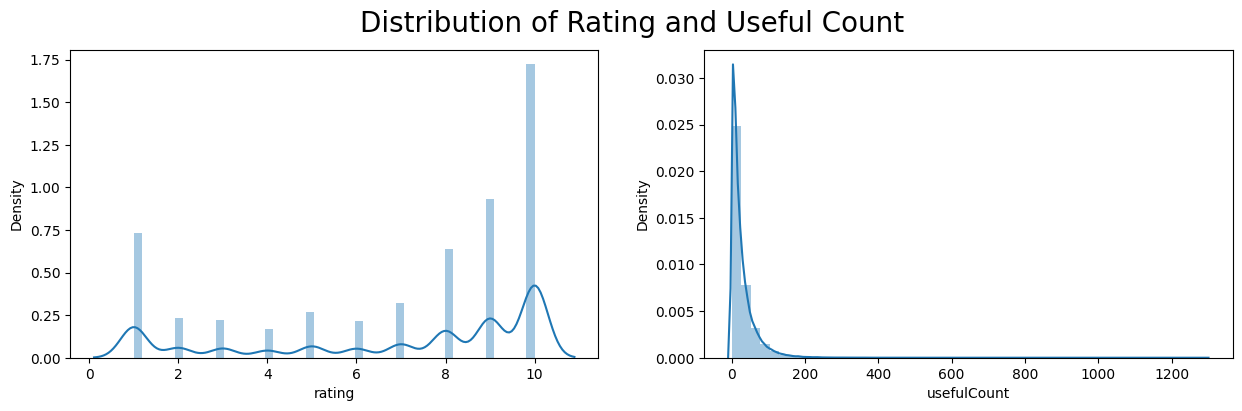

In [ ]:
plt.rcParams['figure.figsize']=(15,4)
plt.subplot(1,2,1)
sns.distplot(data['rating'])
plt.subplot(1,2,2)
sns.distplot(data['usefulCount'])
plt.suptitle('Distribution of Rating and Useful Count\n',fontsize=20)
plt.show()

In [ ]:
def get_sentiment(rating):
    if rating > 6:
        return 'positive'
    else:
        return 'negative'

# Step 2: Apply the function to create the 'sentiment' column
data['sentiment'] = data['rating'].apply(get_sentiment)

does longer reviews lead to positive ratings or not??

In [ ]:
data['len']=data['review'].apply(len)
data[['rating','len']].groupby(['rating']).agg(['min','mean','max'])
#No Impact

len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

In [ ]:
#if we check the longest review,we notice that it contains some unnecesary things

CLEANING THE REVIEWS
# removes all the stop words, spaces, punctuations, so that it can easily perform textual analysis as we know that thepunctuations and numbers hav eno sentimental meaning

**REMOVING PUNCTUATIONS**

In [ ]:
def punctuation_removal(messy_str):
  clean_list=[char for char in messy_str if char not in string.punctuation]
  clean_str=''.join(clean_list)
  return clean_str
data['review']=data['review'].apply(punctuation_removal)

**REMOVING ALL THE STOPWORDS**

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop=stopwords.words('english')
stop.append("i'm")
stop_words=[]
for item in stop:
  new_item=punctuation_removal(item)
  stop_words.append(new_item)
def stopwords_removal(messy_str):
  messy_str=word_tokenize(messy_str)
  return [word.lower() for word in messy_str if word.lower() not in stop_words]
data['review']=data['review'].apply(stopwords_removal)

**REMOVING NUMBERS**

In [ ]:
import re
def drop_numbers(list_text):
  list_text_new=[]
  for i in list_text:
    if not re.search('\d',i):
      list_text_new.append(i)
  return ' '.join(list_text_new)
data['review']=data['review'].apply(drop_numbers)

**ANALYZING CUSTOMER REVIEWS**
# CALCULATING SENTIMENT FROM THE REVIEWS

In [ ]:
#for using Sentiment Analyzer we will ahve to download the Vader Lexicon from NLTK

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

vader_analyzer = SentimentIntensityAnalyzer()

# Step 4: Apply the Vader lexicon method to predict the sentiment for each text in the dataset
data['predicted_sentiment'] = data['review'].apply(lambda x: 'positive' if vader_analyzer.polarity_scores(x)['compound'] > 0 else 'negative')

# Step 5: Compare the predicted sentiment with the true sentiment labels and calculate the accuracy
accuracy = (data['predicted_sentiment'] == data['sentiment']).mean()
print('Accuracy:', accuracy)


Accuracy: 0.6117657327398097


In [ ]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'sentiment', 'len', 'predicted_sentiment'],
      dtype='object')

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from ipywidgets import interact
vader_analyzer = SentimentIntensityAnalyzer()
def predict_top_drugs(condition, num_drugs=5):
     condition_df = data[data['condition'] == condition]
     condition_df['sentiment_score'] = condition_df['review'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])
     top_drugs = condition_df.groupby('drugName')['sentiment_score'].mean().sort_values(ascending=False).head(num_drugs)
     return (top_drugs.index)

# Step 5: Use the @interact decorator to create an interactive function
@interact
def interactive_top_drugs(condition=data['condition'].unique(), num_drugs=(1, 10)):
    top_drugs = predict_top_drugs(condition, num_drugs)
    print(f"\nTop Drugs for '{condition}':")
    for drug in top_drugs:
        print(drug)




interactive(children=(Dropdown(description='condition', options=('Left Ventricular Dysfunction', 'ADHD', 'Birt…

In [ ]:
print("Number of unique conditions: ",data['condition'].nunique())
data['condition'].value_counts().head(10)

Number of unique conditions:  884


Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

Top 10 Drugs which were helpful to the Highest number of people

In [ ]:
data[['drugName','usefulCount']][data['usefulCount']>data['usefulCount'].mean()].sort_values(by='usefulCount',ascending=False).head(10).reset_index(drop=True)

,drugName,usefulCount
0,Zoloft,1291
1,Sertraline,1291
2,Levonorgestrel,1247
3,Mirena,1247
4,Zoloft,949
5,Adipex-P,796
6,Phentermine,796
7,Celexa,771
8,Citalopram,771
9,Implanon,730


In [ ]:
p = []

In [ ]:
sentiment_map = {'positive': 1, 'negative': 0}
data['sentiment'] = data['sentiment'].map(sentiment_map)


In [ ]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron, RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF features
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train and evaluate different models
models = {
    'Naive Bayes': MultinomialNB(),
    'Linear SVM': LinearSVC(),
    'Perceptron': Perceptron(),
    'Ridge Classifier': RidgeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier()
}

acc = []
pre = []
recal = []
f1_score_list = []
p = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_vec, y_train)

    # Make predictions
    y_pred = model.predict(X_test_vec)
    p += list(y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    precision = precision_score(y_test, y_pred, average='weighted')
    pre.append(precision)
    recall = recall_score(y_test, y_pred, average='weighted')
    recal.append(recall)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_score_list.append(f1)

    # Print evaluation metrics
    print(f"\n{model_name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

# Print the aggregated evaluation metrics
print("\nAggregated Evaluation Metrics:")
print(f"Accuracy List: {acc}")
print(f"Precision List: {pre}")
print(f"Recall List: {recal}")
print(f"F1 Score List: {f1_score_list}")



Naive Bayes Evaluation Metrics:
Accuracy: 0.7441084788029925
Precision: 0.7857553502463964
Recall: 0.7441084788029925
F1 Score: 0.6941100594389394

Linear SVM Evaluation Metrics:
Accuracy: 0.8417705735660848
Precision: 0.8397071002647796
Recall: 0.8417705735660848
F1 Score: 0.8401143036548291

Perceptron Evaluation Metrics:
Accuracy: 0.7984102244389027
Precision: 0.8056741940805424
Recall: 0.7984102244389027
F1 Score: 0.8008455369698623

Ridge Classifier Evaluation Metrics:
Accuracy: 0.8368765586034913
Precision: 0.8343529553354243
Recall: 0.8368765586034913
F1 Score: 0.8337714631873185


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Evaluation Metrics:
Accuracy: 0.8298004987531172
Precision: 0.8270119816517917
Recall: 0.8298004987531172
F1 Score: 0.8260950439967386

SGD Classifier Evaluation Metrics:
Accuracy: 0.8150561097256858
Precision: 0.8149289930505604
Recall: 0.8150561097256858
F1 Score: 0.8059889637236639

Aggregated Evaluation Metrics:
Accuracy List: [0.7441084788029925, 0.8417705735660848, 0.7984102244389027, 0.8368765586034913, 0.8298004987531172, 0.8150561097256858]
Precision List: [0.7857553502463964, 0.8397071002647796, 0.8056741940805424, 0.8343529553354243, 0.8270119816517917, 0.8149289930505604]
Recall List: [0.7441084788029925, 0.8417705735660848, 0.7984102244389027, 0.8368765586034913, 0.8298004987531172, 0.8150561097256858]
F1 Score List: [0.6941100594389394, 0.8401143036548291, 0.8008455369698623, 0.8337714631873185, 0.8260950439967386, 0.8059889637236639]


In [ ]:
import numpy as np
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron, RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
models = {
    'Naive Bayes': MultinomialNB(),
    'Linear SVM': LinearSVC(),
    'Perceptron': Perceptron(),
    'Ridge Classifier': RidgeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_vec, y_train)

    # Make predictions
    y_pred = model.predict(X_test_vec)
    p+=list(y_pred)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    

    # Print the metrics
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    


Naive Bayes Metrics:
Accuracy: 0.7930798004987532
Precision: 0.7919307708723529
Recall: 0.7930798004987532
F1 Score: 0.7924510229752714


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Metrics:
Accuracy: 0.8429551122194514
Precision: 0.8415033793590371
Recall: 0.8429551122194514
F1 Score: 0.842008004185164
Perceptron Metrics:
Accuracy: 0.8113466334164589
Precision: 0.810093878151411
Recall: 0.8113466334164589
F1 Score: 0.810635096400461
Ridge Classifier Metrics:
Accuracy: 0.8334476309226932
Precision: 0.830803582975134
Recall: 0.8334476309226932
F1 Score: 0.8307995310052353


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.8338216957605985
Precision: 0.8313438675014141
Recall: 0.8338216957605985
F1 Score: 0.8316695545224275
SGD Classifier Metrics:
Accuracy: 0.8298628428927681
Precision: 0.8271832371738526
Recall: 0.8298628428927681
F1 Score: 0.8257813993460511


In [ ]:
normalized_useful_count = data['usefulCount'] / data['usefulCount'].max()  # Normalize useful count

overall_scores = np.mean(p, axis=0) * normalized_useful_count

# Calculate the mean score per condition
data['overall_score'] = overall_scores
mean_scores = data.groupby('condition')['overall_score'].mean().reset_index()

# Sort the mean scores in descending order
mean_scores = mean_scores.sort_values(by='overall_score', ascending=False)

In [ ]:
import pandas as pd
from google.colab import files


df = pd.DataFrame(data)

# Convert DataFrame to CSV
csv_data = df.to_csv(index=False)

# Save CSV file to local machine
with open('data.csv', 'w') as f:
    f.write(csv_data)
files.download('data.csv')

In [ ]:
import numpy as np
import pandas as pd
import ipywidgets as widgets

# Create a function to display the top drugs for a given condition
def display_top_drugs(condition):
    top_drugs = data[data['condition'] == condition]
    unique_drugs = top_drugs['drugName'].unique()
    top_5_drugs = unique_drugs[:5]
    for drug in top_5_drugs:
     print(drug)

# Get the unique conditions in the dataset
conditions = data['condition'].unique()

# Create an interactive widget using a dropdown menu to select the condition
condition_dropdown = widgets.Dropdown(options=conditions, description='Condition:')
widgets.interact(display_top_drugs, condition=condition_dropdown)


In [ ]:
import numpy as np
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron, RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import ipywidgets as widgets

# Assuming you have loaded the 'data' DataFrame

X_train, X_test, y_train, y_test = train_test_split(data['review'], data['drugName'], test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
models = {
    'Naive Bayes': MultinomialNB(),
    'Linear SVM': LinearSVC(),
    'Perceptron': Perceptron(),
    'Ridge Classifier': RidgeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier()
}

model_dropdown = widgets.Dropdown(
    options=models.keys(),
    description='Model:'
)

output = widgets.Output()

@output.capture()
def get_top_drugs(model_name):
    model = models[model_name]
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    # Assuming you have a 'condition' column in your 'data' DataFrame
    condition = data.loc[y_pred == 1, 'condition']
    top_drugs = condition.value_counts().nlargest(5)
    print(f"Top 5 drugs for {model_name}:")
    print(top_drugs)

def on_model_dropdown_change(change):
    output.clear_output()
    get_top_drugs(change.new)

model_dropdown.observe(on_model_dropdown_change, names='value')

display(model_dropdown)
display(output)


Dropdown(description='Model:', options=('Naive Bayes', 'Linear SVM', 'Perceptron', 'Ridge Classifier', 'Logist…

Output()

In [ ]:
import numpy as np
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Assuming you have loaded the 'data' DataFrame

X_train, X_test, y_train, y_test = train_test_split(data['review'], data['drugName'], test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# Assuming you have a 'condition' column in your 'data' DataFrame
condition = data.loc[y_pred == 1, 'condition']
top_drugs = condition.value_counts().nlargest(5)

print("Top 5 drugs for Naive Bayes:")
print(top_drugs)
